This notebook predicts whether any person will purchase any product or not given his age group, education and review. Though the data available is very less then the chances of error are also very high.

Data source: Kaggle

# Import Library

 The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.

In [1]:
import pandas as pd

# Import data

Dataset is imported from github in raw form.

In [2]:
data = pd.read_csv('https://github.com/Muskan2320/Classification/raw/main/Customer%20Purchase/CustomerPurchase.csv')
data.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


# Define dependent and independent variables

In [3]:
print(data.columns)                                            # Returns the name of columns

Y = data['Purchased']
X = data.drop(['Customer ID','Purchased'], axis=1)        # axis = 1 means it drops the column

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')


# Encoding categorical variable

In [5]:
X.replace({'Review':{'Poor':0, 'Average':1, 'Good':3}}, inplace = True)
X.replace({'Gender':{'Female':1, 'Male':0}}, inplace = True)
X.replace({'Education':{'School':0, 'UG':1, 'PG':2}}, inplace = True)

X.head()

,Age,Gender,Education,Review
0,30,1,0,1
1,68,1,1,0
2,70,1,2,3
3,72,1,2,3
4,16,1,1,1


# Split training and test data

In [6]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.7 means splitting the data in 70% train data and 30% test data. It can also be done using test_size = 0.3
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 200)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((35, 4), (15, 4), (35,), (15,))

# Select Model

We are using rrandom forest classifier for prediction. Random forests or random decision forests is an ensemble learning method for classification, regression. It constructs multiple decision tress and result is the class given by maximum of decision trees.

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [8]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model prediction on test data

In [9]:
y_pred = model.predict(X_test)

# Model Accuracy

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
print("Accuracy score")
accuracy_score(Y_test, y_pred)

Accuracy score


0.4666666666666667

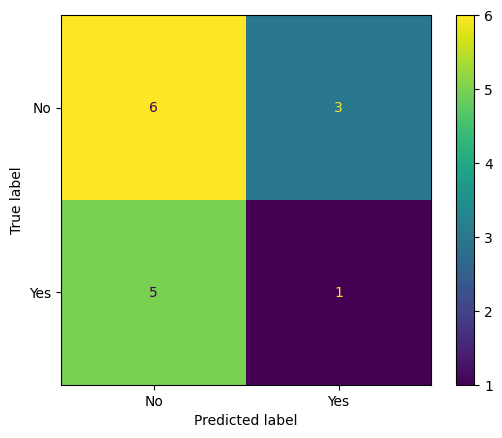

In [15]:
import matplotlib.pyplot as plt

matrix = confusion_matrix(Y_test, y_pred)                                # It creates the confusion matrix and returns an array
cm = ConfusionMatrixDisplay(matrix, display_labels=['No','Yes'])         # It displays the confusion matrix. Lables must be in alphabetical order
cm.plot()

In [16]:
# It displays the precision, recall, f1-score.

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          No       0.55      0.67      0.60         9
         Yes       0.25      0.17      0.20         6

    accuracy                           0.47        15
   macro avg       0.40      0.42      0.40        15
weighted avg       0.43      0.47      0.44        15

